#                        <u> HR ANALYTICS- EMPLOYEE ATTRITION</u>

<b>Employee Attrition</b> is the gradual reduction in staff numbers that occurs as employees retire or resign and are not replaced.

<b>The dataset is about employee attrition. This analysis can discover if any particular factors or patterns that lead to attrition and we would like to come up with the best possible classifications which could be used to predict if a certain employee is going to leave.<b> 

<img src="https://www.thedigitaltransformationpeople.com/wp-content/uploads/2018/01/ted-bauer-640x400-c-default.jpg">

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('attrition.csv')

In [32]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [33]:
df.shape

(1470, 35)

In [34]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [36]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [37]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Data Cleaning

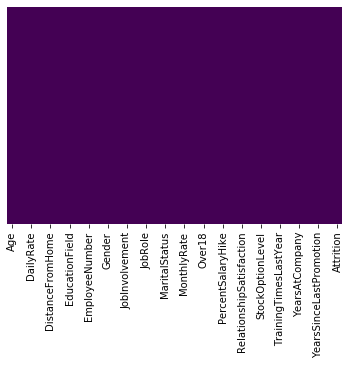

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no missing values in our dataset

-->Check and remove if there are any fields which does not add value

In [39]:
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
df = df.drop('Over18', axis = 1)

In [40]:
pd.set_option('display.max_columns', None)
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


<b>OBSERVATION-

1-The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.

2-The average monthly income of employees who left the company is less than that of the employees who stayed.

3-The employees who had less distance of office from home  are less likely to leave.

4-The employees who were working for more years are less likely to leave .

# Handling Text and categorical values

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime","Attrition"]
labelencoder = LabelEncoder()
for column in columns:
    df[column] = labelencoder.fit_transform(df[column])

In [43]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


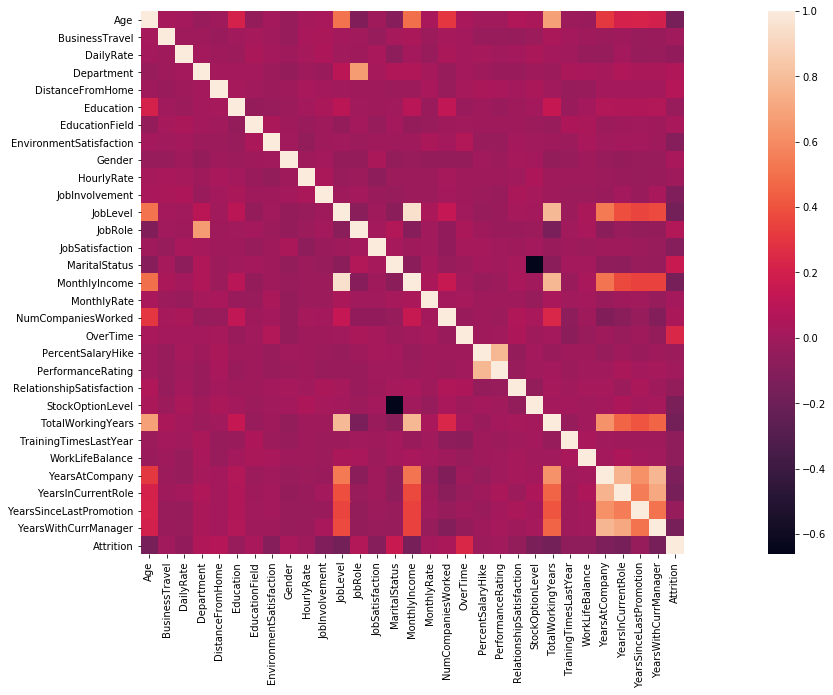

In [15]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),square = True)

<b>Targeted attribute attrition showed poor correlation with other attributes, which can tell us that correct classification of leaving employees was not a piece of cake. 

# Training the model

In [44]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:, -1].values 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Select Multiple Classifiers and Test Them

In [47]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 83.4239%
Log Loss: 2.160043894115652
SVC
****Results****
Accuracy: 84.2391%
Log Loss: 0.4473589205455822
DecisionTreeClassifier
****Results****
Accuracy: 80.9783%
Log Loss: 6.569875944684099
RandomForestClassifier
****Results****
Accuracy: 86.1413%
Log Loss: 0.34918883406735485
GaussianNB
****Results****
Accuracy: 79.6196%
Log Loss: 0.5332829444174602
LogisticRegression
****Results****
Accuracy: 84.2391%
Log Loss: 0.40390946771076136


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


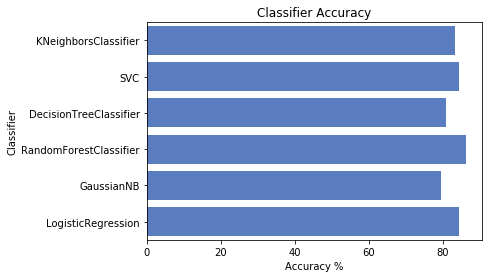

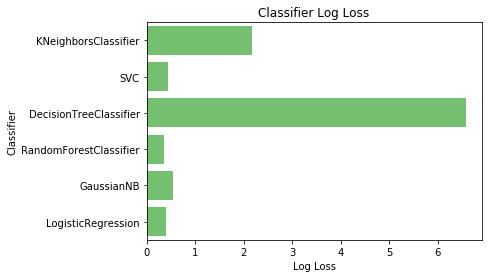

In [48]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

<b>So from here maximum accuracy comes out from <u>logisticRegression model</u> 
    and now we use it to predict future data<b>

In [92]:
Randome_clf=RandomForestClassifier(random_state=0)

In [93]:
Randome_clf.fit(X_train,y_train)
y_pred=Randome_clf.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print("confusion matrix\n", confusion_matrix(y_test,y_pred))
print('\n')
Random_score=Randome_clf.score(X_test,y_test)
print(" score",Random_score)
print('\n')
print(classification_report(y_test,y_pred))

confusion matrix
 [[308   2]
 [ 46  12]]


 score 0.8695652173913043


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       310
           1       0.86      0.21      0.33        58

    accuracy                           0.87       368
   macro avg       0.86      0.60      0.63       368
weighted avg       0.87      0.87      0.83       368



In [91]:
y_pred_prob=Randome_clf.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob to stay (0)','Prob of leave (1)'])
y_pred_prob_df.head()

,Prob to stay (0),Prob of leave (1)
0,0.89,0.11
1,0.95,0.05
2,0.89,0.11
3,0.86,0.14
4,0.25,0.75


# TUNING THE MODEL

In [80]:
from sklearn.model_selection import RandomizedSearchCV
r_clf = RandomForestClassifier(random_state=0)
param_grid = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_random = RandomizedSearchCV(estimator = r_clf, param_distributions = param_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [82]:
best_parameters = rf_random.best_params_
print('The best parameters for using this model is', best_parameters)
print('Accuracy',rf_random.best_score_)

The best parameters for using this model is {'n_estimators': 2000, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': None}
Accuracy 0.8584357084357084


# Feautre importance

In [83]:
importances = pd.DataFrame({'feature':df.iloc[:, :-1].columns,'importance':rf_random.best_estimator_.feature_importances_}) 
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.085734
Age,0.068725
OverTime,0.066317
TotalWorkingYears,0.058868
DailyRate,0.055260
MonthlyRate,0.048999
YearsAtCompany,0.046450
HourlyRate,0.043999
DistanceFromHome,0.042551


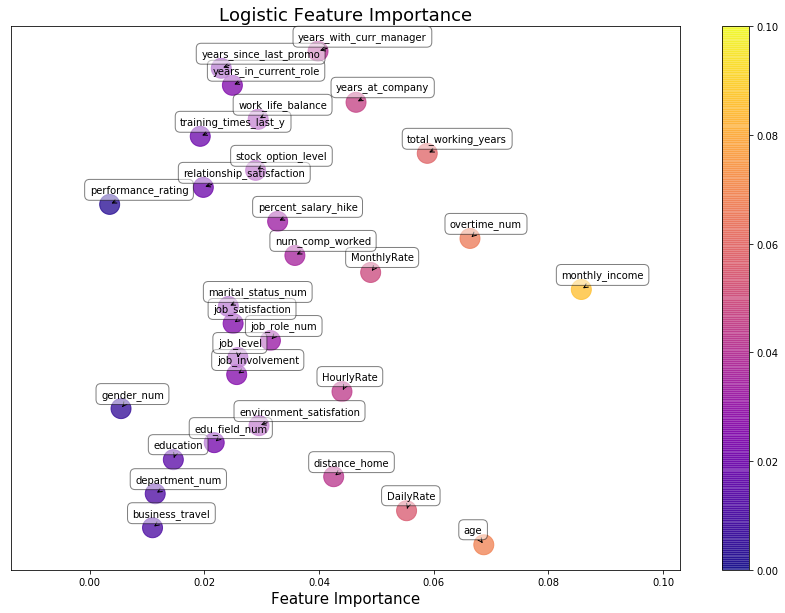

In [85]:
y = ['age', 'business_travel', 'DailyRate','department_num','distance_home', 
     'education', 'edu_field_num', 'environment_satisfation', 'gender_num','HourlyRate',
     'job_involvement', 'job_level', 'job_role_num', 'job_satisfaction',
    'marital_status_num','monthly_income','MonthlyRate' ,'num_comp_worked', 'overtime_num', 'percent_salary_hike',
    'performance_rating', 'relationship_satisfaction', 'stock_option_level', 
    'total_working_years', 'training_times_last_y', 'work_life_balance', 
    'years_at_company', 'years_in_current_role',     'years_since_last_promo',
    'years_with_curr_manager']
x = rf_random.best_estimator_.feature_importances_
plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=x, vmin=0, vmax=0.10, s=400, alpha = 0.75, cmap='plasma')
plt.colorbar()
#plt.ylabel('Attributes')
plt.xlabel('Feature Importance', fontsize=15)
plt.yticks([])
#plt.xticks(rotation=90)
plt.title('Logistic Feature Importance', fontsize=18)
labels = ['age', 'business_travel', 'DailyRate','department_num','distance_home', 
     'education', 'edu_field_num', 'environment_satisfation', 'gender_num','HourlyRate',
     'job_involvement', 'job_level', 'job_role_num', 'job_satisfaction',
    'marital_status_num','monthly_income','MonthlyRate' ,'num_comp_worked', 'overtime_num', 'percent_salary_hike',
    'performance_rating', 'relationship_satisfaction', 'stock_option_level', 
    'total_working_years', 'training_times_last_y', 'work_life_balance', 
    'years_at_company', 'years_in_current_role',     'years_since_last_promo',
    'years_with_curr_manager']
for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show() 

 The top five ranked attributes are <b> monthly income, age, dailyRate, overtime and total working years.</b> are the major problems of employees attrition